# Distribution B - Maximum Likelihood - Convergance Rate

In [24]:
import DistExampB as db
from matplotlib import pyplot as plot
import sympy as sp

import MleDist

from math import sqrt

from LocUtil import Grid1, MinMax, SetSeed, UnZip
from LocMath import Interp1
from Log import Log
from Map import LogRatio
from Sinc import InterpZ

In [42]:
nSamp = 100
nSincRange = range(2,16)

dist = db.ExampB()

In [26]:
xSym = sp.Symbol('x')
zSym = sp.Symbol('z')

map_ = LogRatio(xSym,zSym, xRange=(0,2))
map_.forSym

log(x/(2 - x))

In [27]:
import importlib
importlib.reload(MleDist)

<module 'MleDist' from 'F:\\Users\\Kenne.DESKTOP-BT6VROU\\Documents\\GitHub\\ManetSim\\CdfFit\\MleDist.py'>

In [28]:
seed = SetSeed()
print(f'seed = {seed}')

seed = 38489


In [29]:
sampX = tuple(sorted(dist.Sample() for _ in range(nSamp)))
sampZ = tuple(map_.Forward(x) for x in sampX)

In [38]:
import importlib
importlib.reload(MleDist)

<module 'MleDist' from 'F:\\Users\\Kenne.DESKTOP-BT6VROU\\Documents\\GitHub\\ManetSim\\CdfFit\\MleDist.py'>

In [53]:
nSincRange = range(2,16)

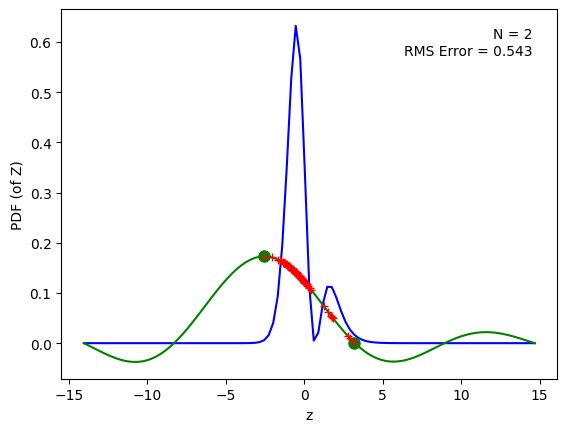

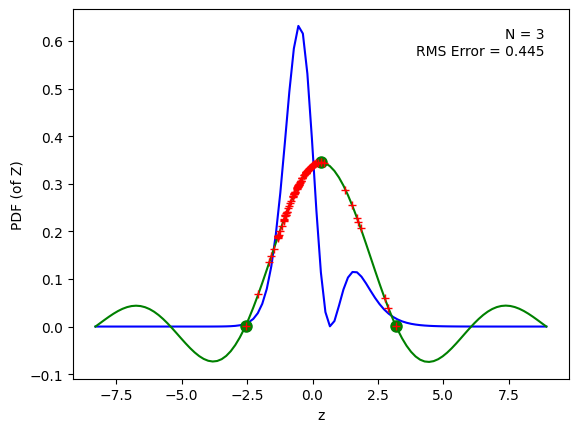

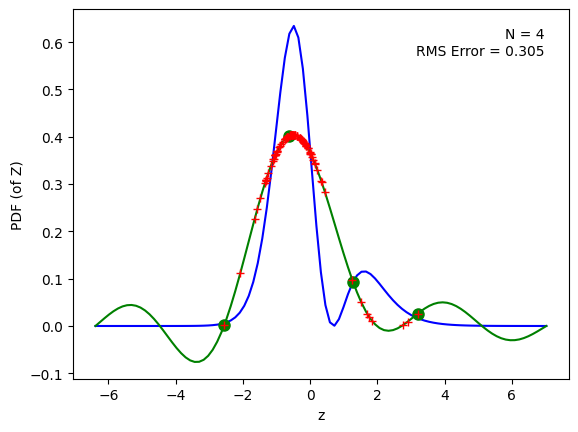

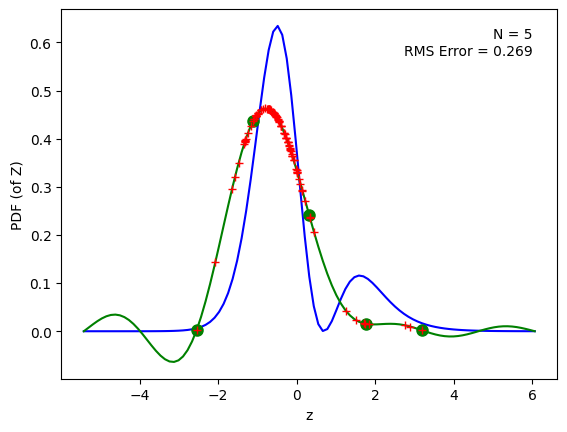

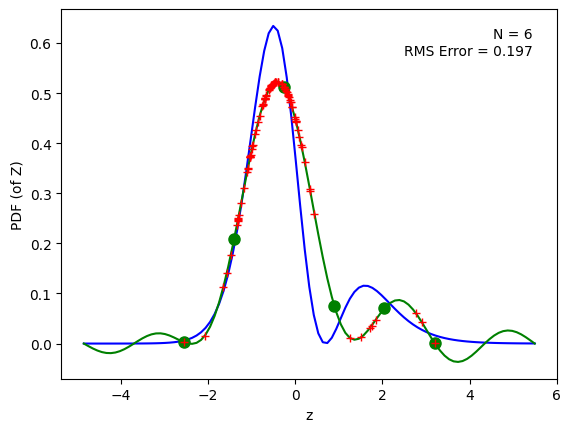

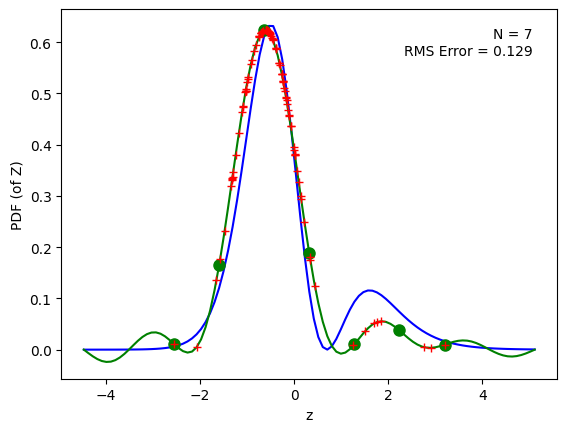

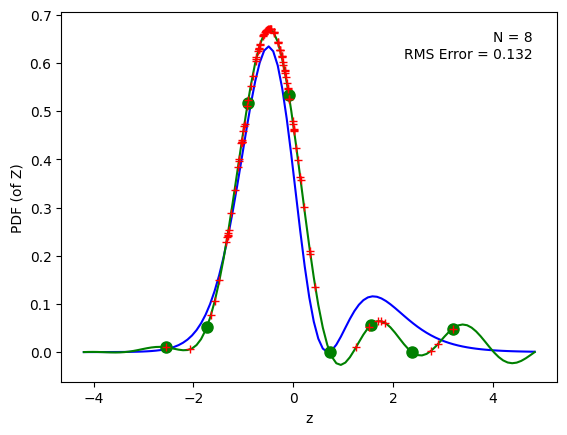

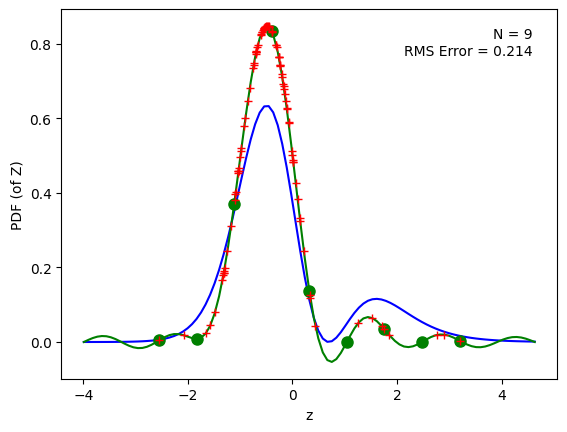

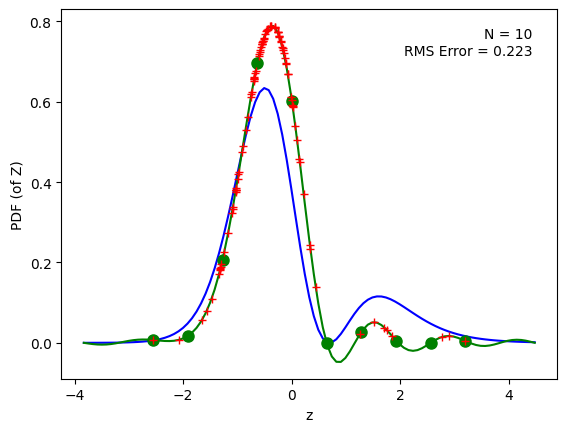

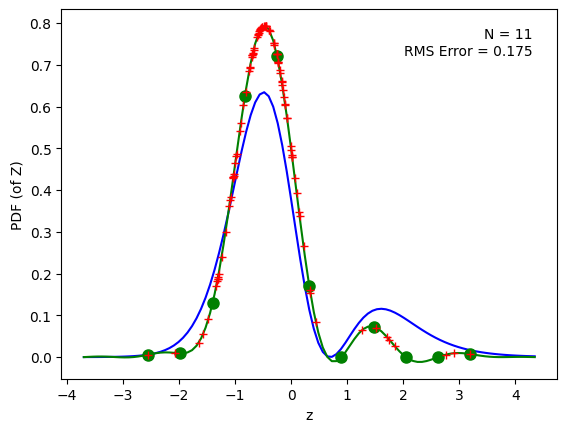

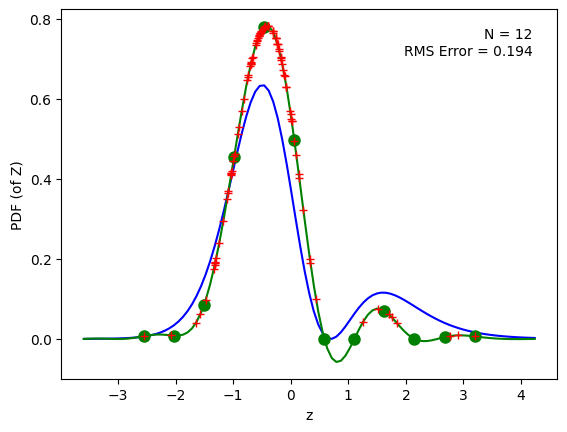

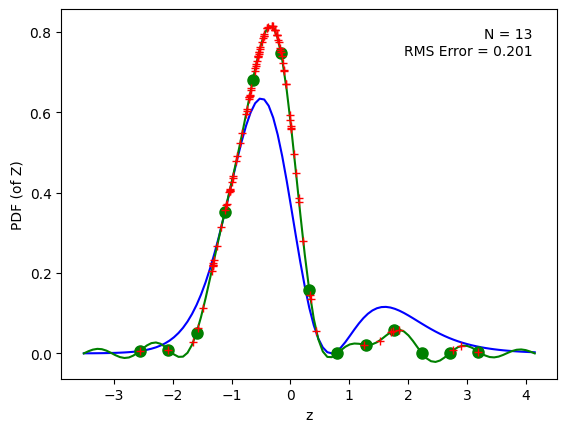

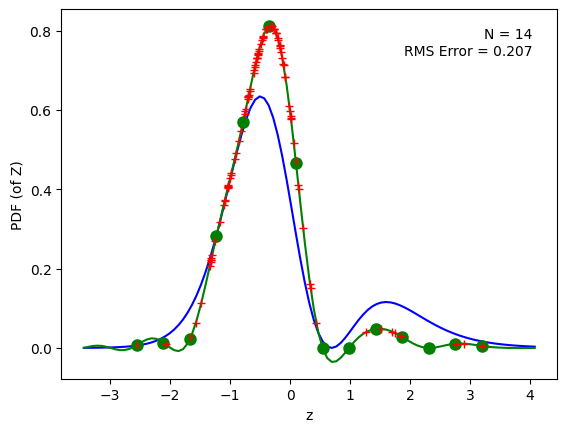

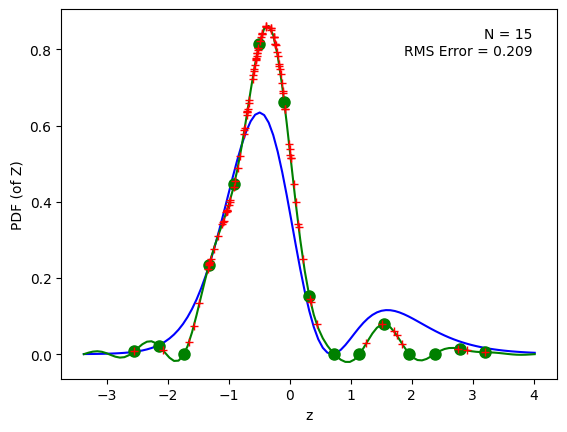

In [55]:
nErrPoint = 40
zMin,zMax = (sampZ[0],sampZ[nSamp - 1])

for nSinc in nSincRange:
	# compute MLE
	sincPoint = MleDist.DistZ(sampX, map_, nSinc)
	h = sincPoint[1][0] - sincPoint[0][0]
	
	# plot fit
	plotRange = (zMin - 2*h, zMax + 2*h)
	MleDist.PlotEstZ(sincPoint, dist, map_, plotRange, sampX=sampX)
	
	# computer RMS true error
	errGrid = Grid1(*plotRange, nErrPoint)
	pdfTrue = tuple(dist.Pdf(map_.Inverse(z)) * map_.JacobZ(z) for z in errGrid)
	pdfEst = InterpZ(*UnZip(sincPoint), errGrid)

	diff = tuple(pt - pe for (pt,pe) in zip(pdfTrue,pdfEst))
	
	hGrid = (plotRange[1] - plotRange[0]) / (nErrPoint - 1)
	L2Err = sqrt(hGrid * sum(d*d for d in diff))

	# add annotation	
	xMin,xMax, yMin,yMax = plot.axis()
	xPos = Interp1(xMin,xMax, 0.95)
	yPos = Interp1(yMin,yMax, 0.95)
	plot.text(xPos,yPos, f'N = {nSinc}\nRMS Error = {L2Err:.3f}', ha='right', va='top')
	
	plot.show()